In [1]:
from ultralytics import YOLO
import os
from tqdm import tqdm
import cv2
import torch

In [2]:
%matplotlib inline

In [3]:
# Define your dataset paths
train_images = "data/train/images"
train_labels = "data/train/labels"
val_images = "data/val/images"
val_labels = "data/val/labels"

# Make sure label folders exist
os.makedirs(train_labels, exist_ok=True)
os.makedirs(val_labels, exist_ok=True)

print("✅ Folder structure ready.")

✅ Folder structure ready.


In [4]:
# Load a pretrained YOLO model (Nano version for CPU-friendly speed)
auto_label_model = YOLO('yolov8n.pt')

# Define which class IDs we care about (based on COCO dataset)
# COCO class IDs: https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml
TARGET_CLASSES = {
    0: "person",
    1: "bicycle",
    2: "car",
    3: "motorcycle",
    5: "bus",
    7: "truck",
    16: "bird",
    17: "cat",
    18: "dog",
    19: "horse"
}

def auto_label_images(image_folder, label_folder):
    os.makedirs(label_folder, exist_ok=True)

    for file in tqdm(os.listdir(image_folder)):
        if not file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
            continue

        img_path = os.path.join(image_folder, file)
        results = auto_label_model.predict(source=img_path, save=False, verbose=False)

        if not results or len(results[0].boxes) == 0:
            continue

        boxes = results[0].boxes.xywhn  # Normalized [x_center, y_center, w, h]
        cls = results[0].boxes.cls

        label_path = os.path.join(label_folder, file.rsplit('.', 1)[0] + '.txt')

        with open(label_path, 'w') as f:
            for c, b in zip(cls, boxes):
                c = int(c)
                if c not in TARGET_CLASSES:
                    continue
                f.write(f"{c} {' '.join(map(str, b.tolist()))}\n")

    print(f"✅ Auto-labeling complete for folder: {image_folder}")

In [5]:
auto_label_images(train_images, train_labels)
auto_label_images(val_images, val_labels)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 419/419 [00:52<00:00,  7.94it/s]


✅ Auto-labeling complete for folder: data/train/images


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:18<00:00,  8.64it/s]

✅ Auto-labeling complete for folder: data/val/images


In [6]:
yaml_content = """path: data
train: train/images
val: val/images

names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: bus
  5: truck
  6: bird
  7: cat
  8: dog
  9: horse
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml file created successfully!")

✅ data.yaml file created successfully!


# model = YOLO('yolov8n.pt')
# model.train(data='data.yaml', epochs=10, imgsz=448, batch=8)


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0432(a)(square_original).tif: 448x448 (no detections), 123.5ms
Speed: 2.1ms preprocess, 123.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 448)


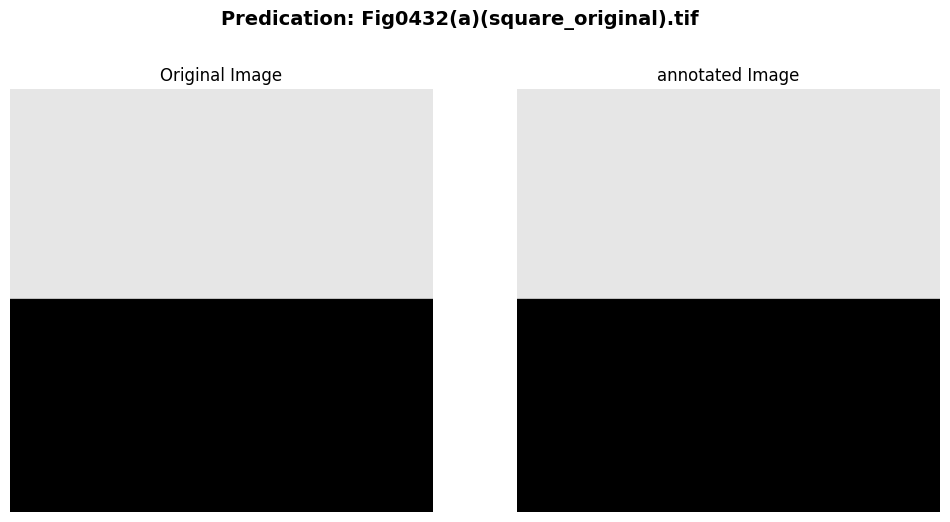


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig1059(b)(PosADI).tif: 448x448 (no detections), 118.5ms
Speed: 3.3ms preprocess, 118.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 448)


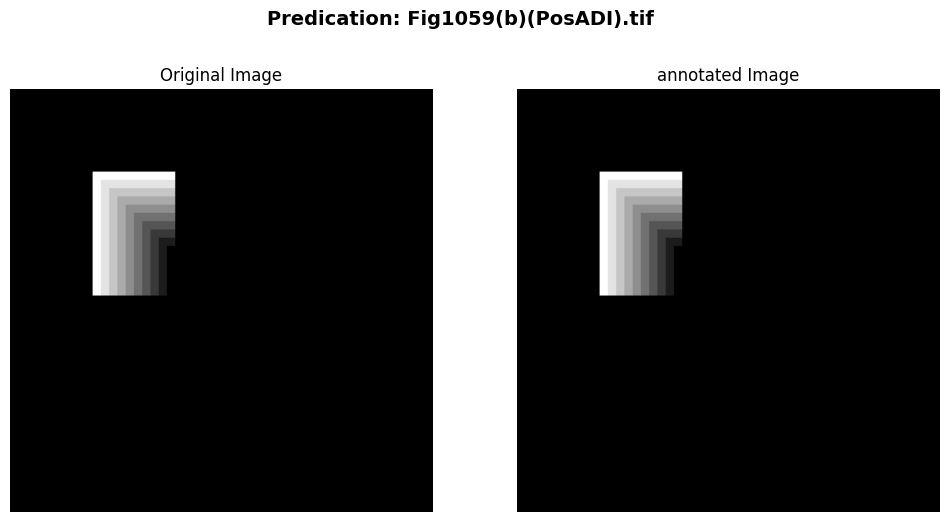


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0115(a)(thum-print-loop).tif: 448x448 (no detections), 89.0ms
Speed: 11.3ms preprocess, 89.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 448)


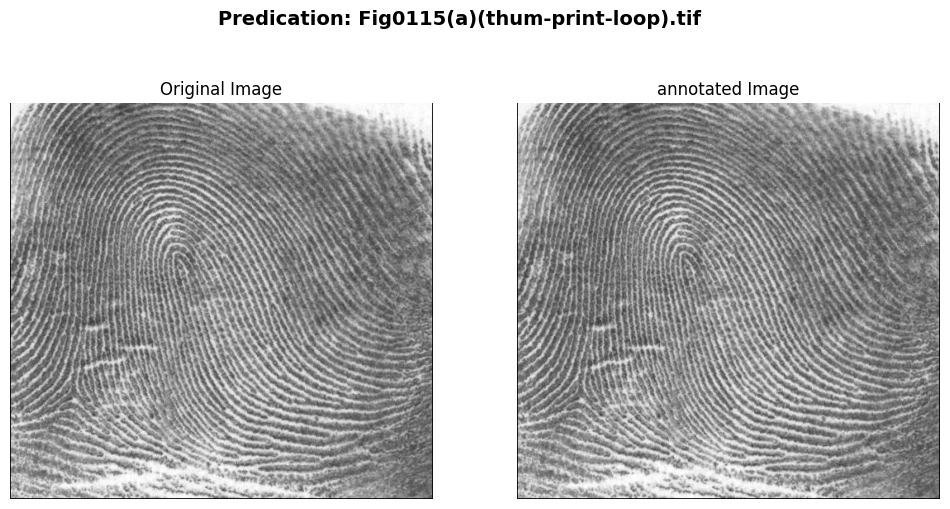


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig1127(a)(WashingtonDC Band4).tif: 448x448 (no detections), 92.1ms
Speed: 5.8ms preprocess, 92.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 448)


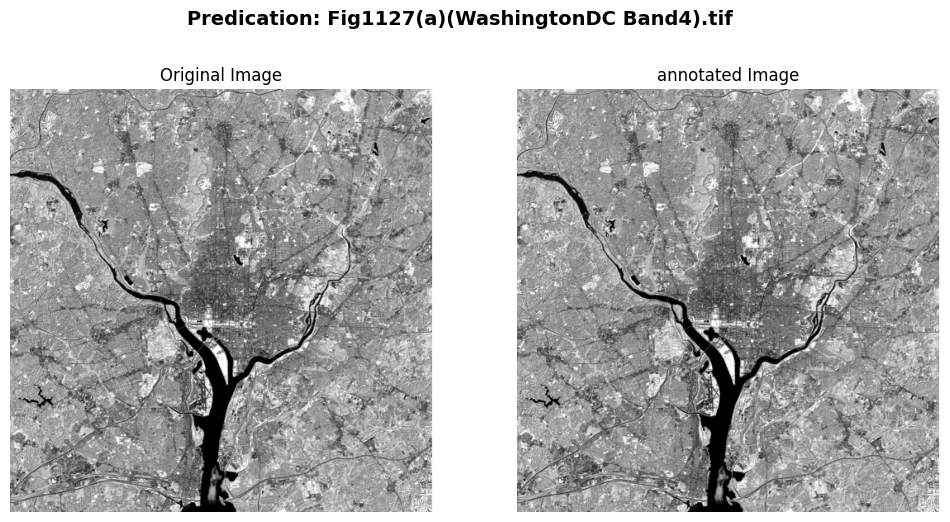


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0840_1652.tif: 256x448 (no detections), 114.7ms
Speed: 2.0ms preprocess, 114.7ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 448)


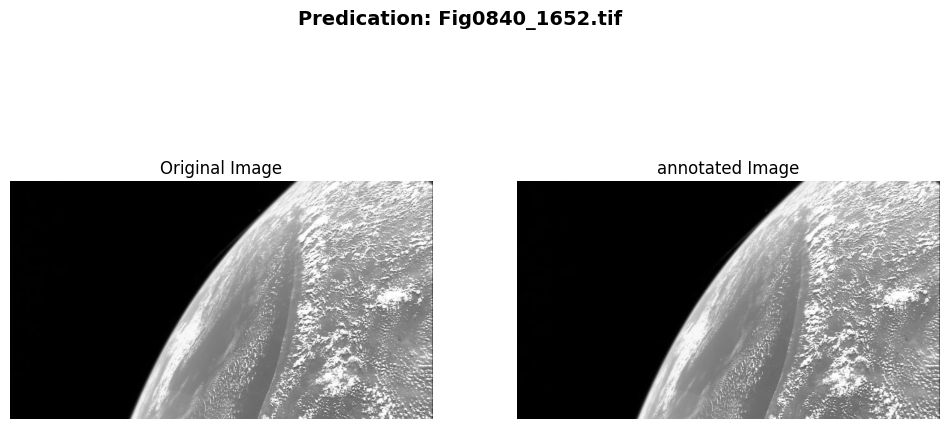


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\FigP0936.tif: 448x288 (no detections), 148.9ms
Speed: 3.3ms preprocess, 148.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 288)


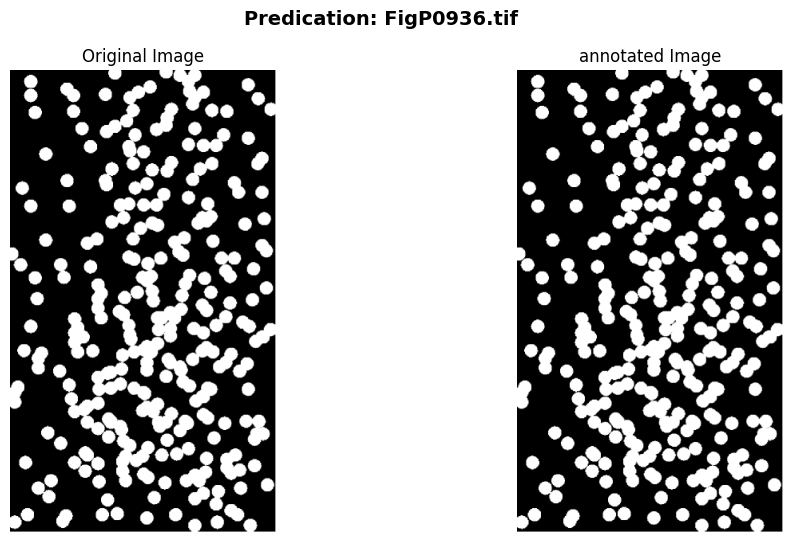


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0222(a)(face).tif: 448x448 2 persons, 100.3ms
Speed: 3.1ms preprocess, 100.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 448)


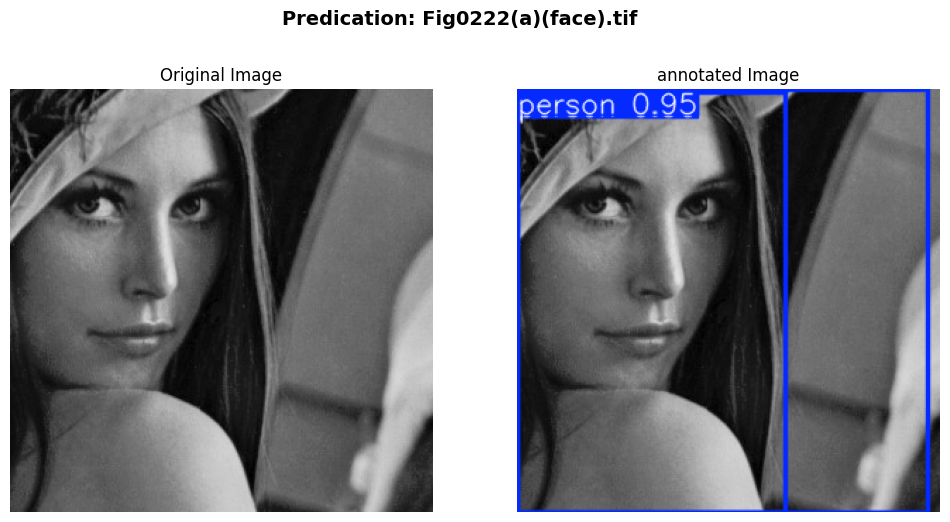


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig1116(leg_bone).tif: 448x288 (no detections), 102.8ms
Speed: 2.1ms preprocess, 102.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 288)


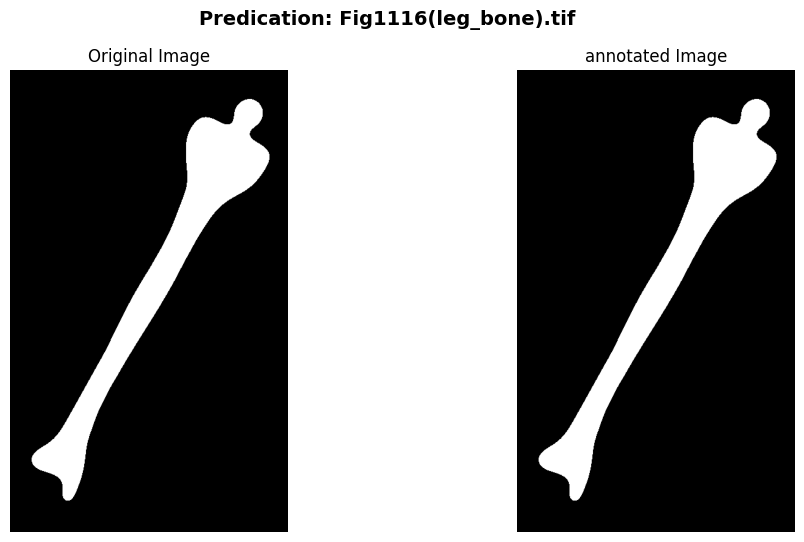


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0907(a)(text_gaps_1_and_2_pixels).tif: 416x448 (no detections), 95.8ms
Speed: 1.7ms preprocess, 95.8ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 448)


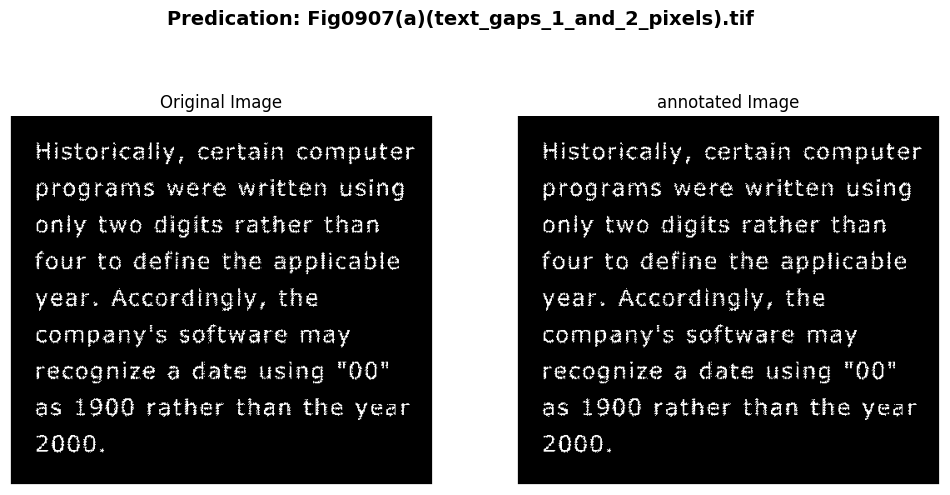


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\FigP0906.tif: 448x448 (no detections), 95.3ms
Speed: 2.1ms preprocess, 95.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 448)


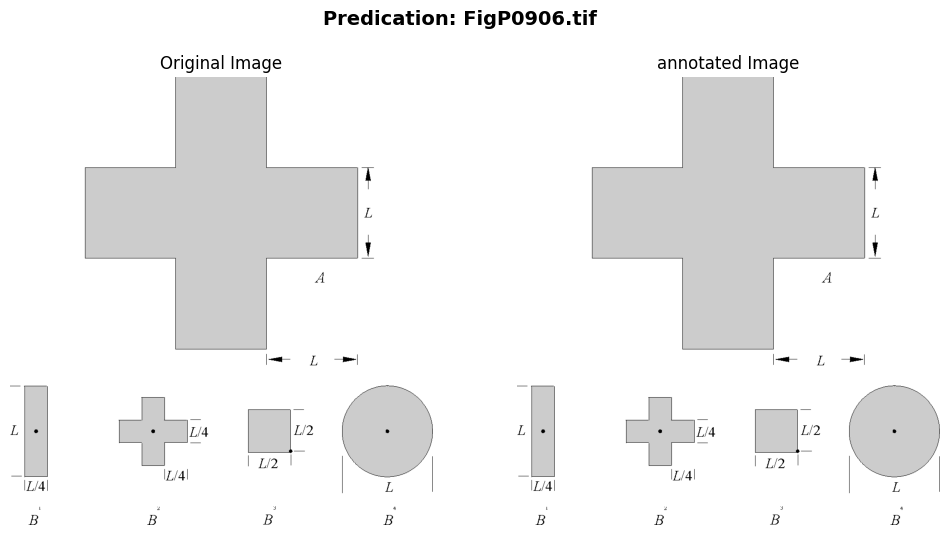


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\FigP0615.tif: 448x448 (no detections), 90.9ms
Speed: 2.1ms preprocess, 90.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 448)


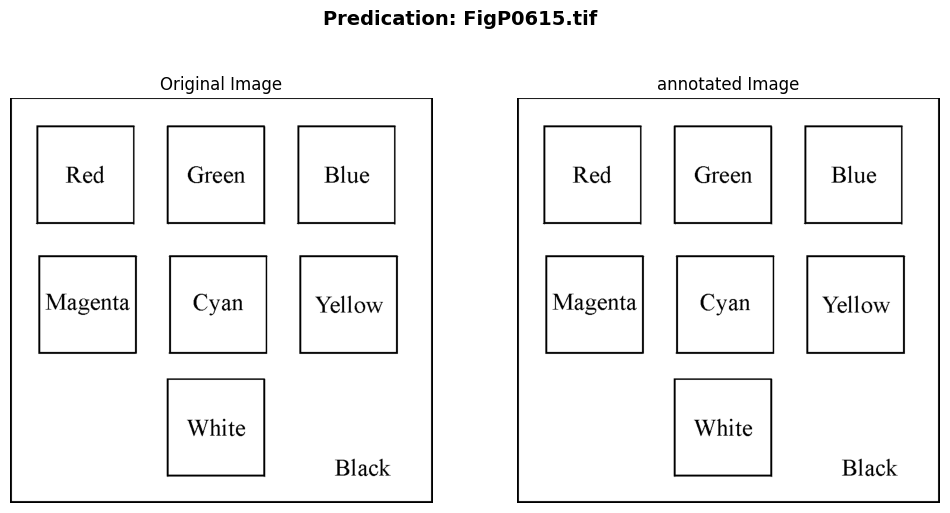


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0109(e)(surface of audio CD).tif: 448x288 (no detections), 115.5ms
Speed: 1.7ms preprocess, 115.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 288)


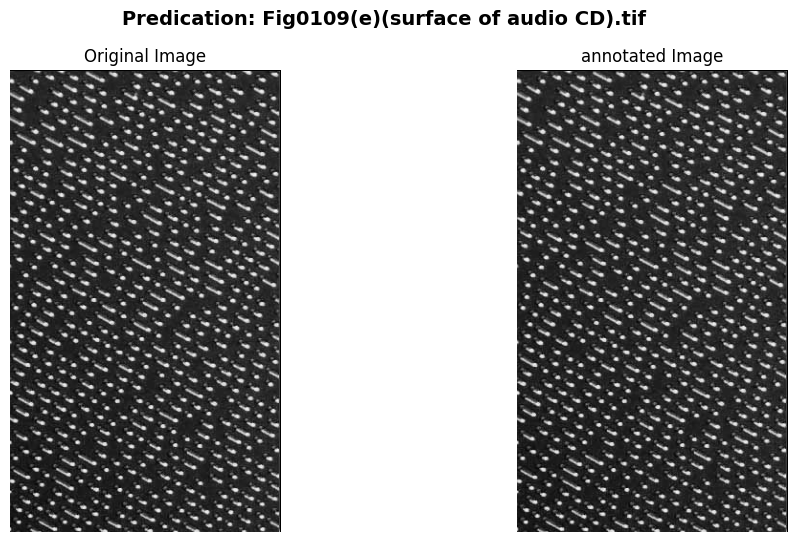


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0835(a).tif: 448x448 (no detections), 90.2ms
Speed: 6.6ms preprocess, 90.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 448)


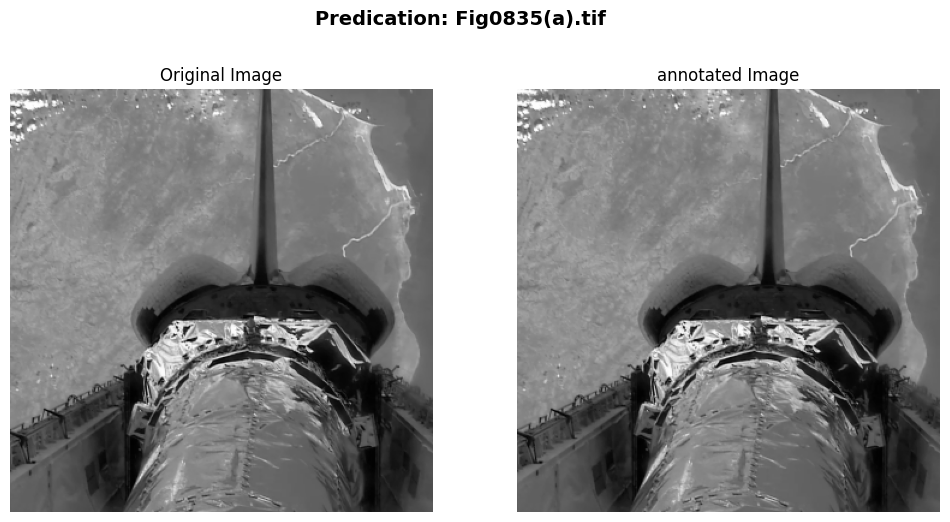


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0459(a)(orig_chest_xray).tif: 320x448 (no detections), 90.8ms
Speed: 1.7ms preprocess, 90.8ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 448)


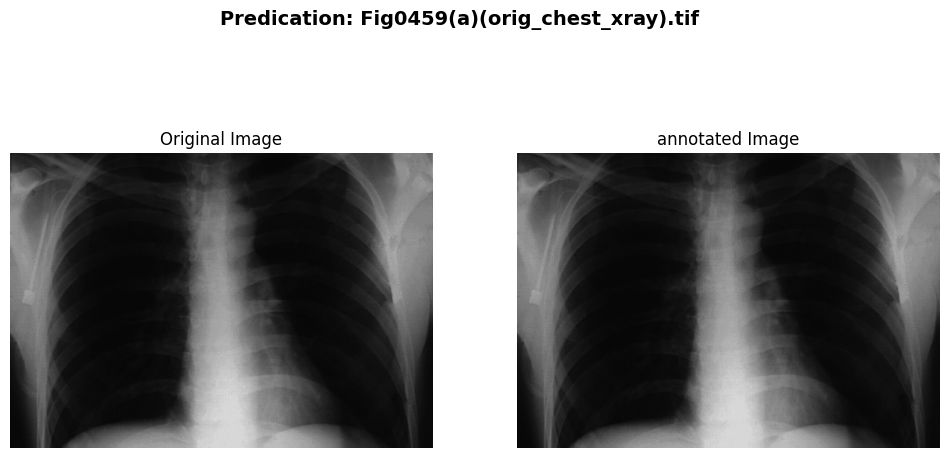


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0111(katrina_2005_08_29_NOAA).tif: 416x448 1 person, 89.4ms
Speed: 2.1ms preprocess, 89.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 448)


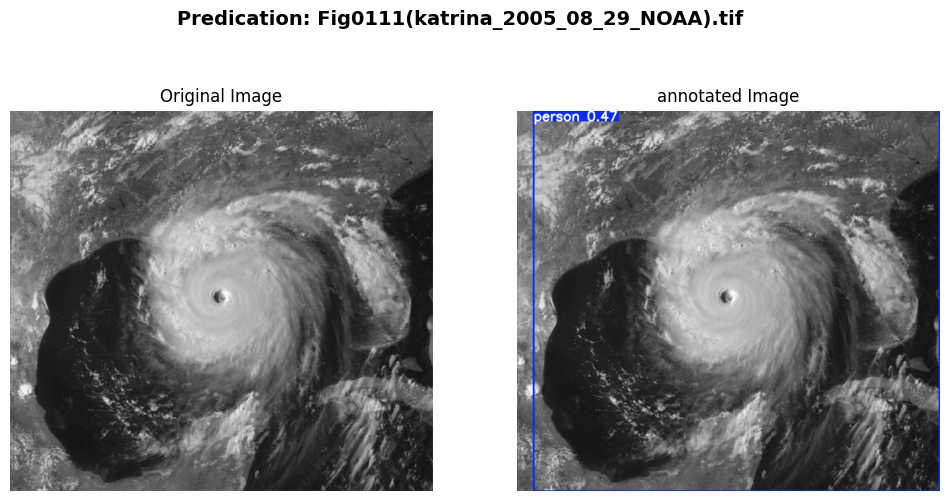


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\FigP0520(blurred-heart).tif: 416x448 (no detections), 94.1ms
Speed: 1.8ms preprocess, 94.1ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 448)


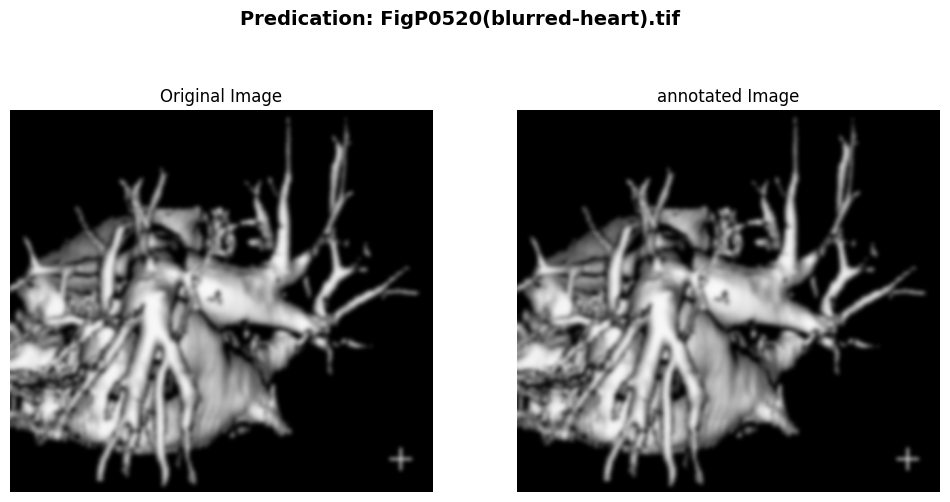


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0108(c)(cygnusloop-extreme ultraviolet).tif: 448x448 (no detections), 97.6ms
Speed: 2.5ms preprocess, 97.6ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 448)


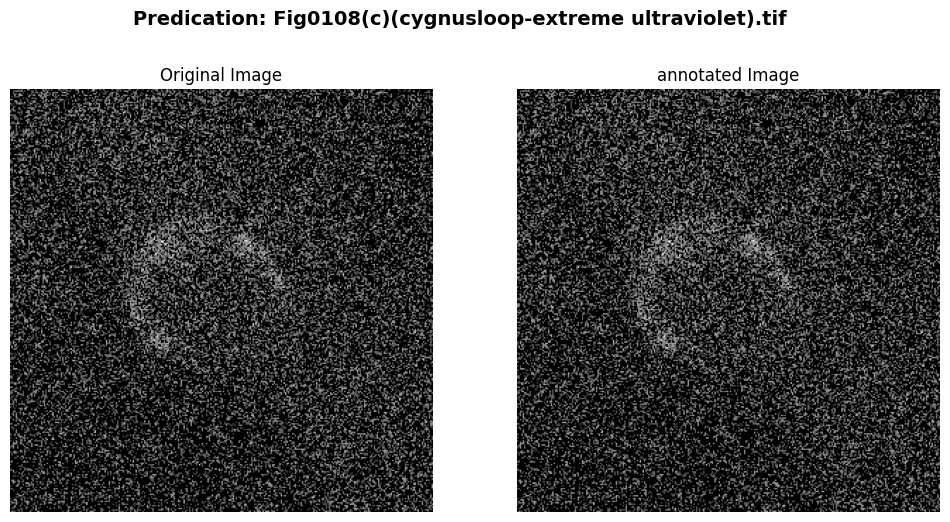


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\FigP0920(a).tif: 448x352 (no detections), 95.1ms
Speed: 3.1ms preprocess, 95.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 352)


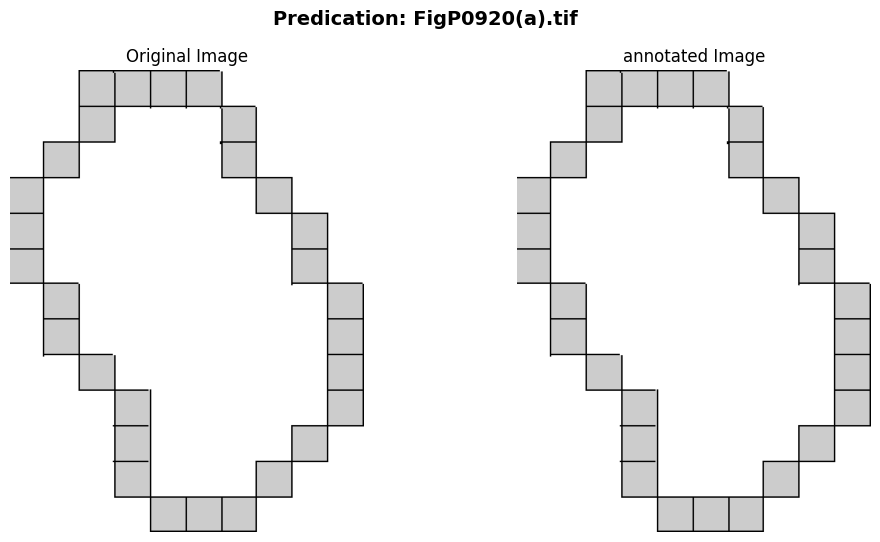


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig1025(a)(building_original).tif: 352x448 (no detections), 83.6ms
Speed: 2.4ms preprocess, 83.6ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 448)


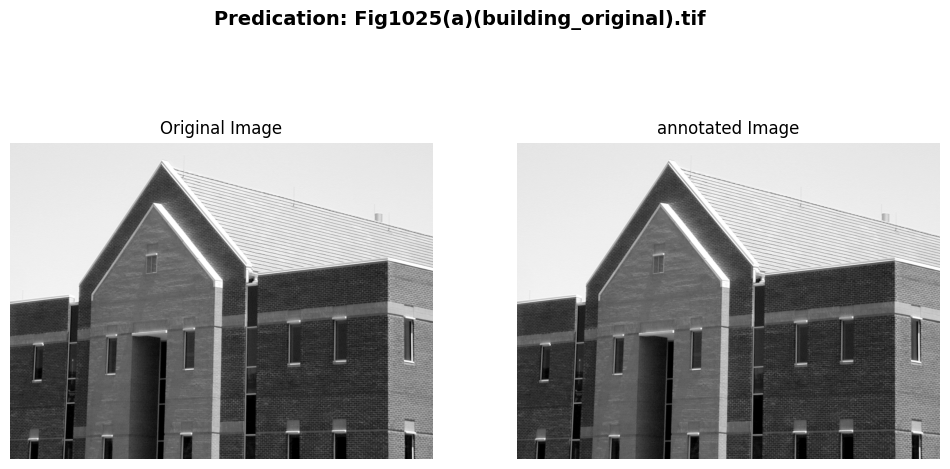


image 1/1 C:\Users\HP\Desktop\Folders\Coding\PROJECTS\CV\yolo_obj_detection\data\val\images\Fig0840_0201.tif: 256x448 (no detections), 93.9ms
Speed: 2.4ms preprocess, 93.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 448)


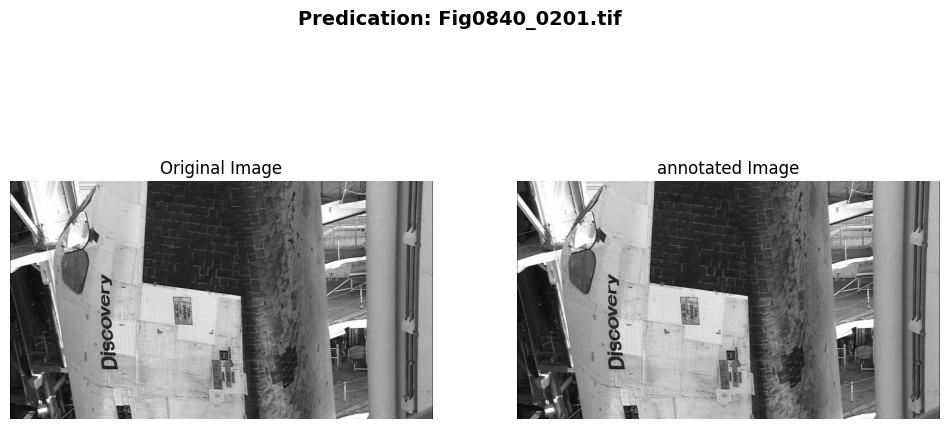

In [18]:
import random 
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO('runs/detect/train7/weights/best.pt')

image_dir = 'data/val/images'

sample_images = random.sample(os.listdir(image_dir), 20)

for img_name in sample_images:
    img_path = os.path.join(image_dir, img_name)

    result = model(img_path)

    annotated_img = result[0].plot()

    original_img = cv2.imread(img_path)

    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize = (12, 6))
    plt.suptitle(f"Predication: {img_name}", fontsize = 14, fontweight = "bold")

    plt.subplot(1,2,1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(annotated_img)
    plt.title("annotated Image")
    plt.axis("off")  

    plt.show()

Found 161 images
Shape: (483, 282, 3)
This image appears to be grayscale.


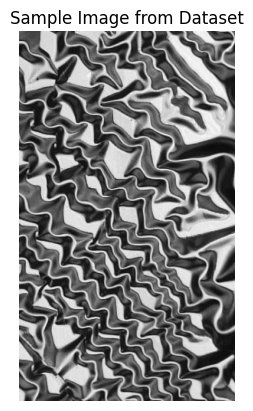

In [22]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

dataset_dir = "data/val/images" 
images = os.listdir(dataset_dir)

print(f"Found {len(images)} images")

img_path = os.path.join(dataset_dir, random.choice(images))

img = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Shape:", img_rgb.shape)

if np.allclose(img_rgb[..., 0], img_rgb[..., 1]) and np.allclose(img_rgb[..., 1], img_rgb[..., 2]):
    print("This image appears to be grayscale.")
    plt.imshow(img_rgb[..., 0], cmap = 'gray')
else:
    print("This image is colored.")
    plt.imshow(img_rgb)

plt.title("Sample Image from Dataset")
plt.axis('off')
plt.show()

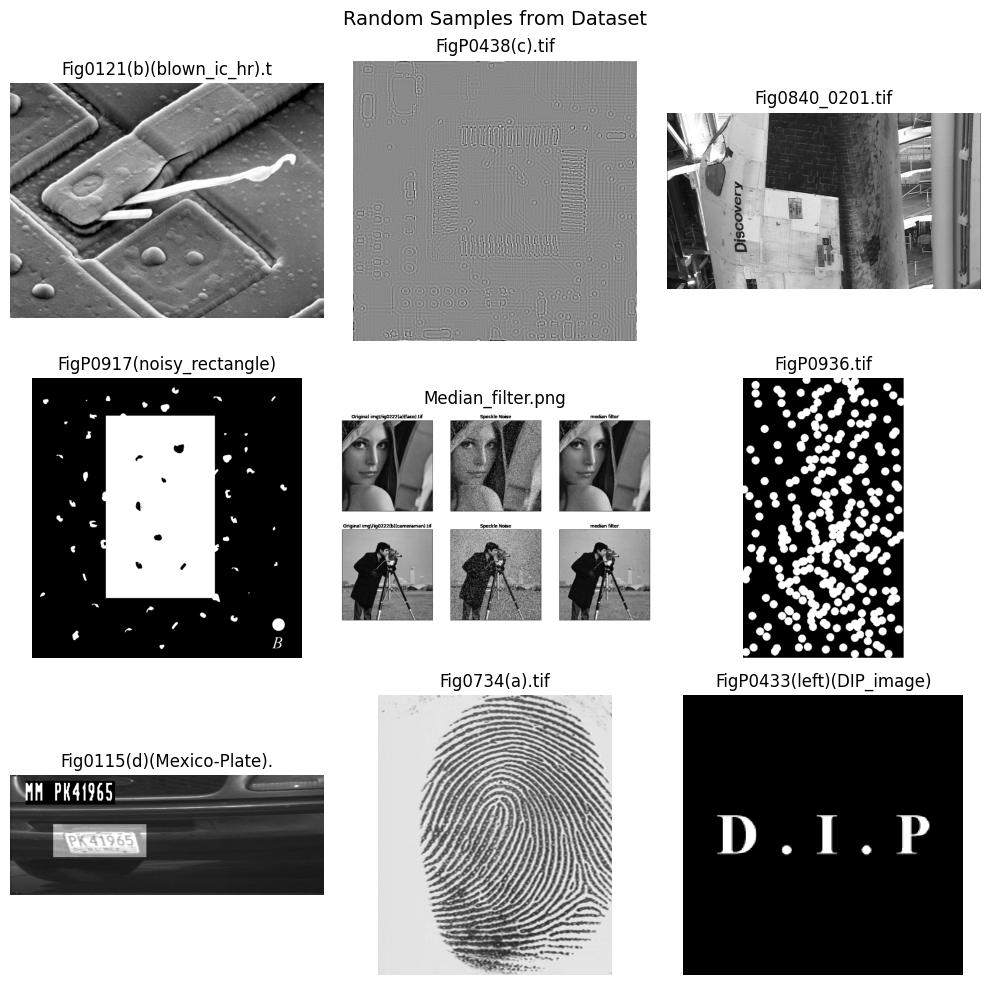

In [23]:
%matplotlib inline
import cv2
import os
import random
import matplotlib.pyplot as plt

dataset_dir = "data/val/images"
images = os.listdir(dataset_dir)

sample_images = random.sample(images, 9)

plt.figure(figsize=(10, 10))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(dataset_dir, img_name)
    img = cv2.imread(img_path)
    
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(img_name[:25])
    plt.axis('off')

plt.suptitle("Random Samples from Dataset", fontsize=14)
plt.tight_layout()
plt.show(block=True)

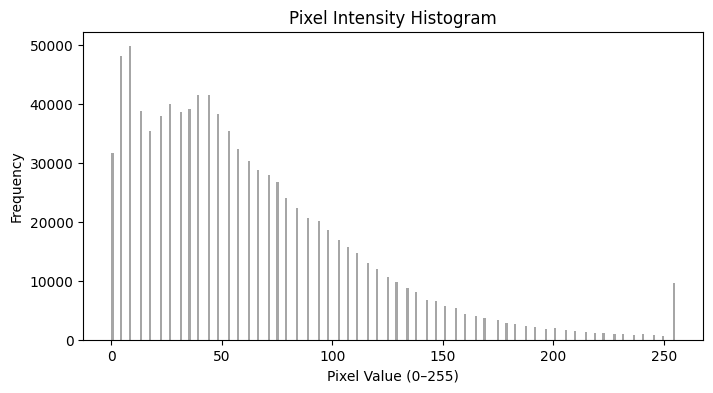

In [24]:
import numpy as np

# Load one random image
sample_path = os.path.join(dataset_dir, random.choice(images))
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 4))
plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
plt.title("Pixel Intensity Histogram")
plt.xlabel("Pixel Value (0–255)")
plt.ylabel("Frequency")
plt.show()

In [25]:
shapes = []
for img_name in images:
    img_path = os.path.join(dataset_dir, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        shapes.append(img.shape[:2])  # (height, width)

unique_shapes = set(shapes)
print(f"Unique image shapes: {len(unique_shapes)}")
print("Examples:", list(unique_shapes)[:5])

Unique image shapes: 99
Examples: [(1294, 1247), (484, 283), (482, 566), (651, 814), (300, 300)]


📁 Found 161 images in dataset



C:\Users\HP\anaconda3\envs\yoloproject\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127902 (\N{FILM FRAMES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


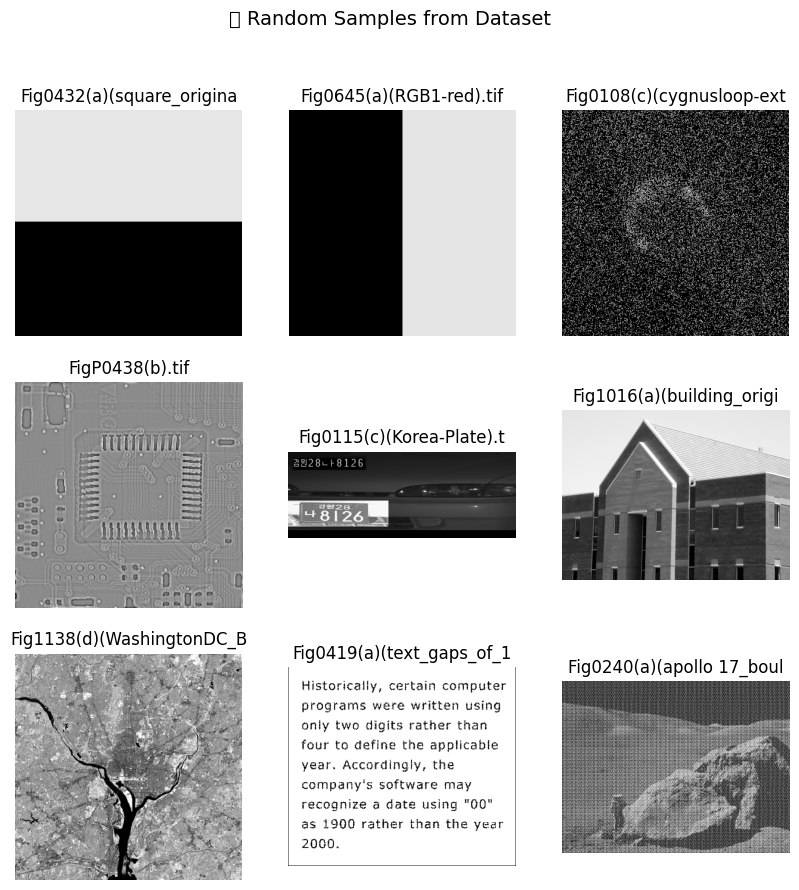

C:\Users\HP\anaconda3\envs\yoloproject\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129654 (\U0001fa76) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


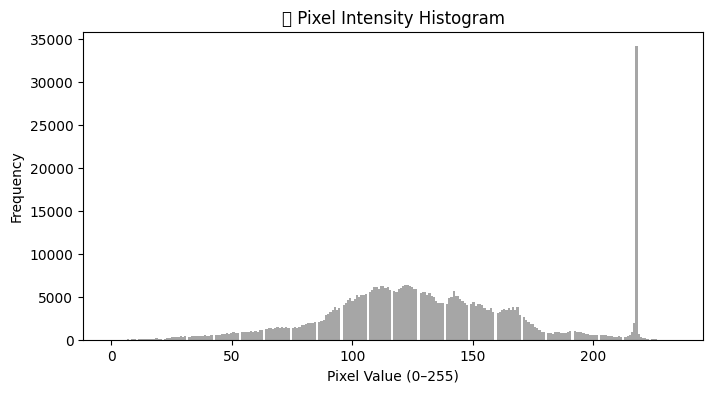

📏 Unique image shapes: 99
Example resolutions: [(1294, 1247), (484, 283), (482, 566), (651, 814), (300, 300)]


In [26]:
# 📊 Dataset Exploration (for grayscale and mixed images)
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# === 1️⃣ Dataset Path ===
dataset_dir = "data/val/images"  # adjust if needed
images = os.listdir(dataset_dir)
print(f"📁 Found {len(images)} images in dataset\n")

# === 2️⃣ Visualize 9 Random Images ===
sample_images = random.sample(images, min(9, len(images)))

plt.figure(figsize=(10, 10))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(dataset_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    # Convert to RGB for correct color display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(img_name[:25])
    plt.axis('off')

plt.suptitle("🎞️ Random Samples from Dataset", fontsize=14)
plt.show()

# === 3️⃣ Pixel Intensity Histogram (for a random image) ===
sample_path = os.path.join(dataset_dir, random.choice(images))
img_gray = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

if img_gray is not None:
    plt.figure(figsize=(8, 4))
    plt.hist(img_gray.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title("🩶 Pixel Intensity Histogram")
    plt.xlabel("Pixel Value (0–255)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("⚠️ Could not read sample image for histogram.")

# === 4️⃣ Image Resolution Analysis ===
shapes = []
for img_name in images:
    img_path = os.path.join(dataset_dir, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        shapes.append(img.shape[:2])  # (height, width)

unique_shapes = set(shapes)
print(f"📏 Unique image shapes: {len(unique_shapes)}")
print("Example resolutions:", list(unique_shapes)[:5])

In [27]:
import cv2
import os
from tqdm import tqdm

# Input and output folders
input_dir = "data/val/images"
output_dir = "processed_dataset"
os.makedirs(output_dir, exist_ok=True)

# Desired image size
target_size = (448, 448)

# Process and save all images
for img_name in tqdm(os.listdir(input_dir), desc="Processing images"):
    img_path = os.path.join(input_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    # Convert grayscale (1 or 2 channels) to 3 channels
    if len(img.shape) == 2 or img.shape[2] == 1:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Resize to target size
    img_resized = cv2.resize(img, target_size)

    # Save processed image
    cv2.imwrite(os.path.join(output_dir, img_name), img_resized)

print(f"\n✅ Processed images saved to '{output_dir}'")

Processing images: 100%|██████████████████████████████████████████████████████████████████████████| 161/161 [00:05<00:00, 27.52it/s]


✅ Processed images saved to 'processed_dataset'


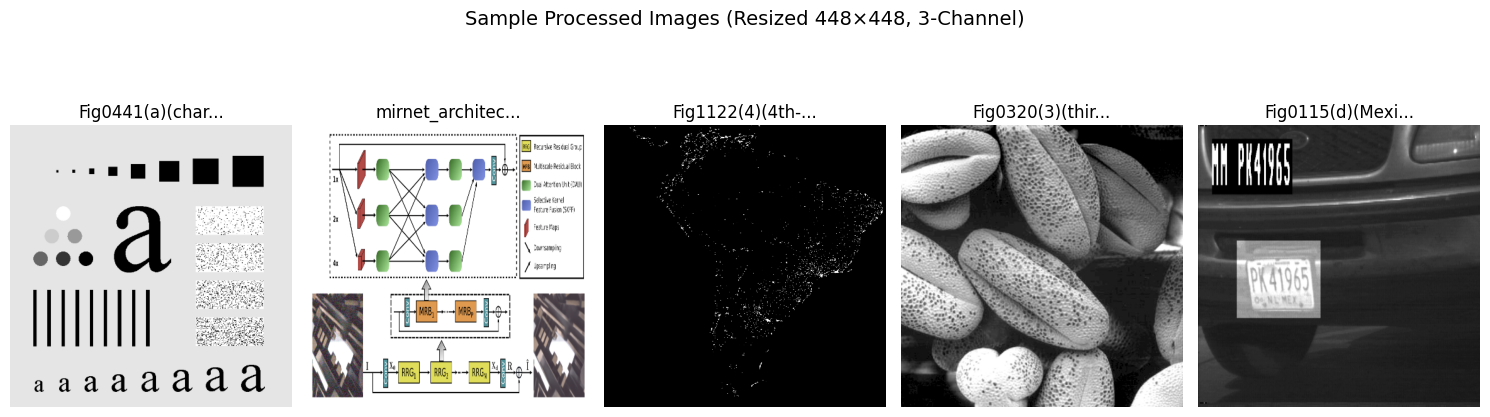

In [28]:
import cv2
import os
import random
import matplotlib.pyplot as plt

processed_dir = "processed_dataset"

# Pick a few random images
sample_images = random.sample(os.listdir(processed_dir), 5)

plt.figure(figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(processed_dir, img_name)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img_rgb)
    plt.title(img_name[:15] + '...')
    plt.axis('off')

plt.suptitle("Sample Processed Images (Resized 448×448, 3-Channel)", fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
import tensorflow
print(tensorflow.version)   

<module 'tensorflow._api.v2.version' from 'C:\\Users\\HP\\anaconda3\\envs\\yoloproject\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1542
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1522
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1504
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1484
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1459
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1429
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1394
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1352
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1302
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1245
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1178
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1101
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1014
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0916
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0809
Epoch 16/500
1/1 ━━━

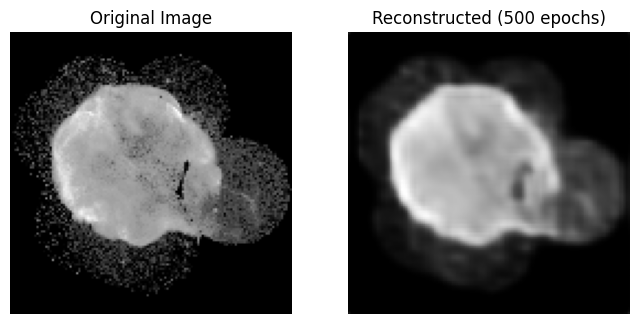

In [3]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Path to dataset
dataset_dir = "data/val/images"
image_files = os.listdir(dataset_dir)

# Pick a random image
img_name = random.choice(image_files)
img_path = os.path.join(dataset_dir, img_name)

# Read and preprocess image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=(0, -1))  # shape (1, 128, 128, 1)

# Define autoencoder
input_img = Input(shape=(128, 128, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train on single image (acts like overfitting test)
history = autoencoder.fit(
    img, img,
    epochs=500,
    batch_size=1,
    verbose=1
)

# Reconstruct the image
reconstructed = autoencoder.predict(img)

# Visualize original vs reconstructed
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed[0, :, :, 0], cmap='gray')
plt.title("Reconstructed (500 epochs)")
plt.axis('off')

plt.show()

In [4]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mae')
autoencoder.fit(img, img, epochs=2500, batch_size=1, verbose=1)

Epoch 1/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0339
Epoch 2/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1056
Epoch 3/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0479
Epoch 4/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0537
Epoch 5/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0639
Epoch 6/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0527
Epoch 7/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0389
Epoch 8/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0387
Epoch 9/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0430
Epoch 10/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0458
Epoch 11/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0457
Epoch 12/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0430
Epoch 13/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0393
Epoch 14/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0371
Epoch 15/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0374
Epoch 

Training on image: Fig0422(newspaper_shot_woman).tif, shape: (1, 128, 128, 3)
Epoch 1/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2332
Epoch 2/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2151
Epoch 3/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2004
Epoch 4/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1827
Epoch 5/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1617
Epoch 6/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1434
Epoch 7/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1547
Epoch 8/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1589
Epoch 9/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1466
Epoch 10/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1402
Epoch 11/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1419
Epoch 12/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1451
Epoch 13/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1465
Epoch 14/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.

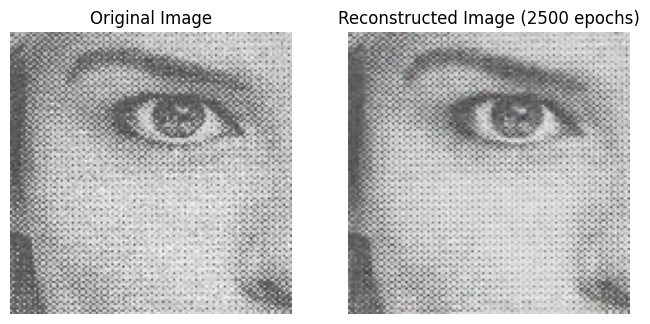

In [5]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# ---- Step 1: Load dataset ----
dataset_dir = "data/val/images"
images = os.listdir(dataset_dir)

# Pick one random image
img_name = random.choice(images)
img_path = os.path.join(dataset_dir, img_name)

# Read the image (convert grayscale if needed)
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

# Ensure image is 3-channel
if len(img.shape) == 2:  # grayscale
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Resize to consistent size (128x128 for fast training)
img = cv2.resize(img, (128, 128))

# Normalize pixel values
img = img.astype('float32') / 255.0

# Add batch dimension
img = np.expand_dims(img, axis=0)

print(f"Training on image: {img_name}, shape: {img.shape}")

# ---- Step 2: Define improved Autoencoder ----
input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Combine into model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

# ---- Step 3: Train the model ----
history = autoencoder.fit(img, img,
                          epochs=2500,
                          batch_size=1,
                          verbose=1)

# ---- Step 4: Reconstruct & visualize ----
reconstructed = autoencoder.predict(img)

# Plot comparison
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed[0])
plt.title("Reconstructed Image (2500 epochs)")
plt.axis('off')

plt.show()

In [6]:
from tensorflow.keras import layers, models, Input

def build_unet(input_shape=(256,256,3)):
    inp = Input(input_shape)
    # encoder
    c1 = layers.Conv2D(64,3,activation='relu',padding='same')(inp)
    c1 = layers.Conv2D(64,3,activation='relu',padding='same')(c1)
    p1 = layers.MaxPool2D()(c1)

    c2 = layers.Conv2D(128,3,activation='relu',padding='same')(p1)
    c2 = layers.Conv2D(128,3,activation='relu',padding='same')(c2)
    p2 = layers.MaxPool2D()(c2)

    # bottleneck
    b = layers.Conv2D(256,3,activation='relu',padding='same')(p2)

    # decoder
    u2 = layers.UpSampling2D()(b)
    u2 = layers.Concatenate()([u2, c2])
    c3 = layers.Conv2D(128,3,activation='relu',padding='same')(u2)
    c3 = layers.Conv2D(128,3,activation='relu',padding='same')(c3)

    u1 = layers.UpSampling2D()(c3)
    u1 = layers.Concatenate()([u1, c1])
    c4 = layers.Conv2D(64,3,activation='relu',padding='same')(u1)
    c4 = layers.Conv2D(64,3,activation='relu',padding='same')(c4)

    out = layers.Conv2D(3,1,activation='sigmoid')(c4)
    return models.Model(inp, out)

model = build_unet((256,256,3))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_18 (Conv2D)            │ (None, 256, 256, 64)      │           1,792 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_19 (Conv2D)            │ (None, 256, 256, 64)      │          36,928 │ conv2d_18[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_9               │ (None, 128, 128, 64)      │               0 │ conv2d_19[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_21 (Conv2D)            │ (None, 128, 128, 128)     │         147,584 │ conv2d_20[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_10              │ (None, 64, 64, 128)       │               0 │ conv2d_21[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_22 (Conv2D)            │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_10[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_4               │ (None, 128, 128, 256)     │               0 │ conv2d_22[0][0]            │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 128, 128, 384)     │               0 │ up_sampling2d_4[0][0],     │
│                               │                           │                 │ conv2d_21[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_23 (Conv2D)            │ (None, 128, 128, 128)     │         442,496 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_24 (Conv2D)            │ (None, 128, 128, 128)     │         147,584 │ conv2d_23[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_5               │ (None, 256, 256, 128)     │               0 │ conv2d_24[0][0]            │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 256, 256, 192)     │               0 │ up_sampling2d_5[0][0],     │
│                               │                           │                 │ conv2d_19[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,293,187 (4.93 MB)

 Trainable params: 1,293,187 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
pip install scikit-learn   

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.9 MB 9.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/8.9 MB 9.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/8.9 MB 9.1 MB/s eta 0:00:01
   ------------------------------ --------- 6.8/8.9 MB 8.6 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 7.9 MB/s  0:00:01

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [sciki

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, Input

dataset_dir = "data/val/images"  # adjust if needed
target_size = (256, 256)

In [15]:
def preprocess_colorize(img_path, target_size=(256,256)):
    img = cv2.imread(img_path)
    if img is None:
        return None, None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    L = lab[:,:,0] / 100.0           # normalize 0-100 → 0-1
    ab = (lab[:,:,1:] + 128) / 255.0 # normalize -128..127 → 0..1
    return L[...,None], ab

In [16]:
L_list, ab_list = [], []
for img_name in os.listdir(dataset_dir):
    path = os.path.join(dataset_dir, img_name)
    L, ab = preprocess_colorize(path, target_size)
    if L is not None:
        # filter colored images (skip purely grayscale)
        if np.std(ab) > 0.01:  
            L_list.append(L)
            ab_list.append(ab)

L = np.array(L_list)
ab = np.array(ab_list)
print("Dataset:", L.shape, ab.shape)

Dataset: (10, 256, 256, 1) (10, 256, 256, 2)


In [17]:
L_train, L_val, ab_train, ab_val = train_test_split(L, ab, test_size=0.1, random_state=42)

In [18]:
def color_unet(input_shape=(256,256,1)):
    inp = Input(input_shape)
    
    # Encoder
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inp)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPool2D()(c1)
    
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPool2D()(c2)
    
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPool2D()(c3)
    
    b = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    
    # Decoder
    u3 = layers.UpSampling2D()(b)
    u3 = layers.Concatenate()([u3, c3])
    c4 = layers.Conv2D(256, 3, activation='relu', padding='same')(u3)
    
    u2 = layers.UpSampling2D()(c4)
    u2 = layers.Concatenate()([u2, c2])
    c5 = layers.Conv2D(128, 3, activation='relu', padding='same')(u2)
    
    u1 = layers.UpSampling2D()(c5)
    u1 = layers.Concatenate()([u1, c1])
    c6 = layers.Conv2D(64, 3, activation='relu', padding='same')(u1)
    
    out = layers.Conv2D(2, 1, activation='sigmoid')(c6)  # predict ab
    
    model = models.Model(inp, out)
    model.compile(optimizer='adam', loss='mae')
    return model

model = color_unet((256,256,1))
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 256, 256, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_28 (Conv2D)            │ (None, 256, 256, 64)      │             640 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_29 (Conv2D)            │ (None, 256, 256, 64)      │          36,928 │ conv2d_28[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_11              │ (None, 128, 128, 64)      │               0 │ conv2d_29[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_30 (Conv2D)            │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_11[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_31 (Conv2D)            │ (None, 128, 128, 128)     │         147,584 │ conv2d_30[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_12              │ (None, 64, 64, 128)       │               0 │ conv2d_31[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_32 (Conv2D)            │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_12[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_33 (Conv2D)            │ (None, 64, 64, 256)       │         590,080 │ conv2d_32[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_13              │ (None, 32, 32, 256)       │               0 │ conv2d_33[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_34 (Conv2D)            │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_13[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_6               │ (None, 64, 64, 512)       │               0 │ conv2d_34[0][0]            │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 64, 64, 768)       │               0 │ up_sampling2d_6[0][0],     │
│                               │                           │                 │ conv2d_33[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_35 (Conv2D)            │ (None, 64, 64, 256)       │       1,769,728 │ concatenate_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_7               │ (None, 128, 128, 256)     │               

 Total params: 4,647,426 (17.73 MB)

 Trainable params: 4,647,426 (17.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    L_train, ab_train,
    validation_data=(L_val, ab_val),
    batch_size=8,
    epochs=100,
    verbose=1
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - loss: 0.4089 - val_loss: 0.2979
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - loss: 0.1637 - val_loss: 0.2978
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.1482 - val_loss: 0.2978
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - loss: 0.1482 - val_loss: 0.2978
E

In [ ]:
idx = np.random.randint(len(L_val))
pred_ab = model.predict(L_val[idx:idx+1])
pred_ab = pred_ab[0]

# Denormalize and convert back to LAB → RGB
L_ = (L_val[idx][:,:,0] * 100).astype(np.uint8)
ab_ = (pred_ab * 255 - 128).astype(np.int8)
lab_out = np.concatenate((L_[...,None], ab_), axis=2)
rgb_out = cv2.cvtColor(lab_out, cv2.COLOR_LAB2RGB)
rgb_out = np.clip(rgb_out, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(L_val[idx].squeeze(), cmap='gray')
plt.title("Input (Grayscale)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rgb_out)
plt.title("Predicted Colorized")
plt.axis('off')
plt.show()

In [ ]:
model.save("colorizer_unet.h5")

## esrgan x4 -> image and super resolution
## 